In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv("../data/Daily_Demand_Forecasting_Orders.csv")

**Clean up column headers**

In [14]:
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [37]:
df.rename(columns=lambda x: x.replace('(', ''), inplace=True)
df.rename(columns=lambda x: x.replace(')', ''), inplace=True)

**Info on data**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
Week_of_the_month                            60 non-null int64
Day_of_the_week_Monday_to_Friday             60 non-null int64
Non-urgent_order                             60 non-null float64
Urgent_order                                 60 non-null float64
Order_type_A                                 60 non-null float64
Order_type_B                                 60 non-null float64
Order_type_C                                 60 non-null float64
Fiscal_sector_orders                         60 non-null float64
Orders_from_the_traffic_controller_sector    60 non-null int64
Banking_orders_1                             60 non-null int64
Banking_orders_2                             60 non-null int64
Banking_orders_3                             60 non-null int64
Target_Total_orders                          60 non-null float64
ticks                                        60 non-null int64
r

In [73]:
df.shape

(60, 15)

**Correlation Heatmap**

In [38]:
df_corr = df.corr()

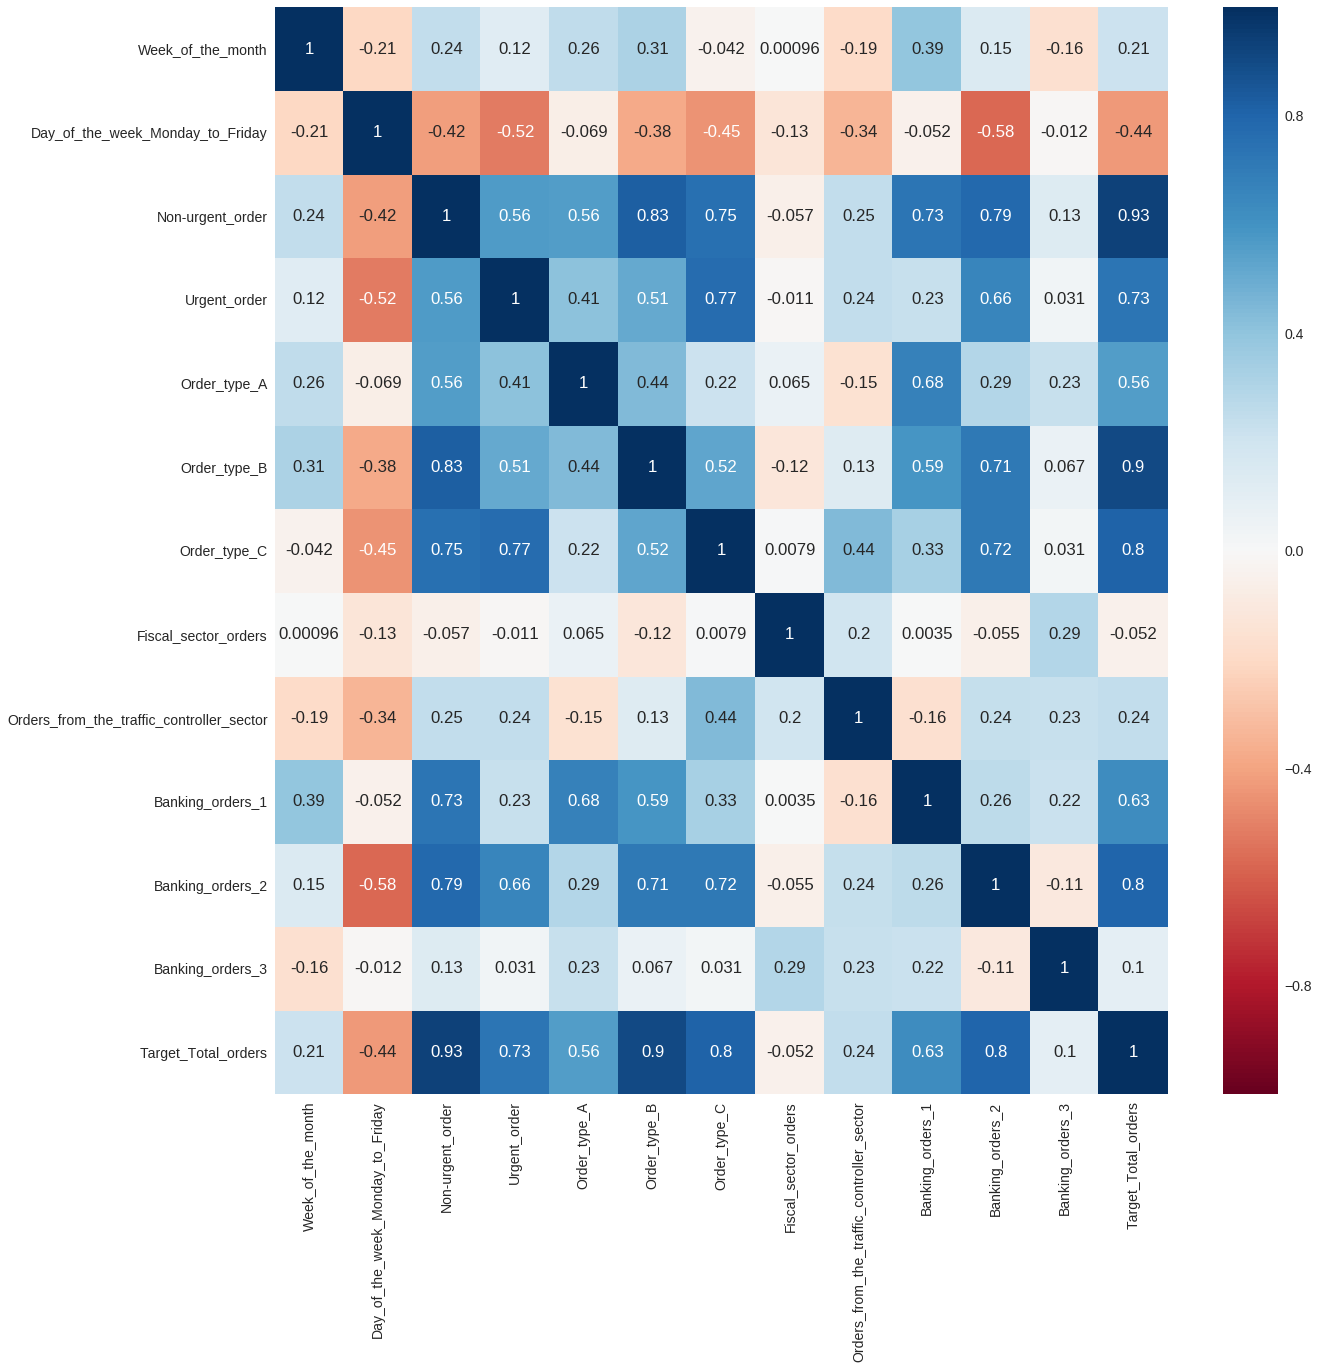

In [39]:
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)
sns.heatmap(df_corr, cmap='RdBu', annot=True)

** Feature Correlation: **
Selecting features that are highly correlated with other features and storing the indexes. 
1. `hi_corrs` sets the threshold for 'highly correlated'. 
2. `hi_count` makes sure it's identifying those features that are highly correlated to at least 2 features (itself and 1 other). 
3. `top_corrs` stores those indexes to a list.

In [74]:
hi_corrs = df_corr.abs() > .75
hi_count = df_corr[hi_corrs].count() > 1
top_corrs = list(df_corr[hi_count].index)

In [75]:
print(len(top_corrs), top_corrs)

6 ['Non-urgent_order', 'Urgent_order', 'Order_type_B', 'Order_type_C', 'Banking_orders_2', 'Target_Total_orders']


**Add ticks**

In [49]:
df.head(2)

,Week_of_the_month,Day_of_the_week_Monday_to_Friday,Non-urgent_order,Urgent_order,Order_type_A,Order_type_B,Order_type_C,Fiscal_sector_orders,Orders_from_the_traffic_controller_sector,Banking_orders_1,Banking_orders_2,Banking_orders_3,Target_Total_orders,ticks
0,1,4,316.307,223.270,61.543,175.586,302.448,0.0,65556,44914,188411,14793,539.577,0
1,1,5,128.633,96.042,38.058,56.037,130.580,0.0,40419,21399,89461,7679,224.675,1


In [41]:
df.Week_of_the_month.unique()

array([1, 2, 3, 4, 5])

In [42]:
df.Day_of_the_week_Monday_to_Friday.unique()

array([4, 5, 6, 2, 3])

In [45]:
df['ticks'] = range(0, len(df.index.values))

**Target over Time**

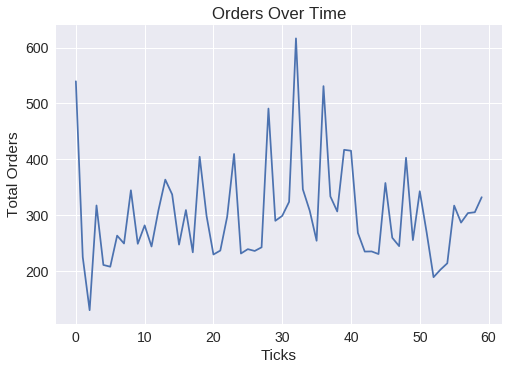

In [57]:
fig = plt.figure(1)
sub1 = fig.add_subplot(111)
sub1.set_xlabel('Ticks')
sub1.set_ylabel('Total Orders')
sub1.set_title('Orders Over Time')
sub1.plot('ticks', 'Target_Total_orders', data = df)

In [58]:
df['rolling_mean'] = df['Target_Total_orders'].rolling(window = 5).mean()

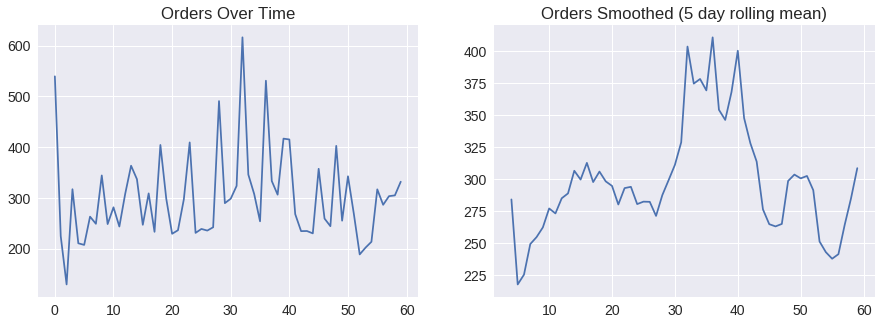

In [62]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
axes[0].plot('ticks', 'Target_Total_orders', data = df);
axes[0].set_title('Orders Over Time');
axes[1].plot('ticks', 'rolling_mean', data = df)
axes[1].set_title('Orders Smoothed (5 day rolling mean)')

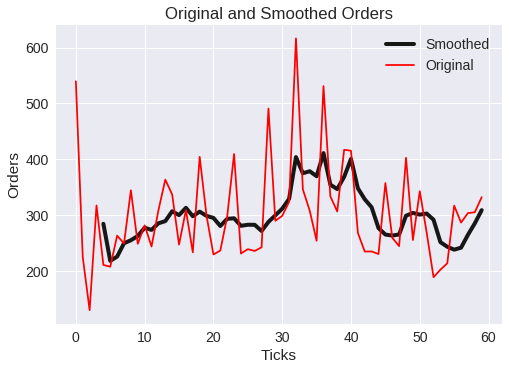

In [68]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.plot(df['ticks'], df['rolling_mean'], color=(0,0,0), linewidth=4, alpha=.9, label='Smoothed')
sub.plot(df['ticks'], df['Target_Total_orders'], color=(1,0,0), label='Original')
sub.set_title('Original and Smoothed Orders')
sub.set_xlabel('Ticks')
sub.set_ylabel('Orders')
sub.legend(loc='upper right')